In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root

## $\theta$ is really $\phi$

In [5]:
def V_harm_deriv(theta, m_a):
    return m_a**2 * theta

def V_harm(theta, m_a):
    return 0.5 * m_a**2 * theta**2

def V_anharm(theta, lamda):
    return lamda / (2*3*4) * theta**4

def V_anharm_deriv(theta, lamda):
    return lamda / (2*3) * theta**3

In [10]:
def H(t): return 1 / (2*t) # radiation domination
def rhs(t, y, V_deriv, params):
    theta, theta_dot = y
    theta_dot2 = - 3 * H(t) * theta_dot - V_deriv(theta, params)
    return theta_dot ,theta_dot2

In [51]:
def kinetic(theta_dot):
    return 0.5 * theta_dot**2

def calc_eos(V_fn, theta, theta_dot, param):
    T = kinetic(theta_dot)
    V = V_fn(theta, param)
    rho = T + V
    p = T - V
    w = p / rho
    return w

In [41]:
def find_parameter(V, energy):
    p_sol = root(lambda p: V(theta0, p) - energy, 1.0)
    assert p_sol.success
    p = p_sol.x[0]
    return p

def solve_eom(V, V_deriv, p, interval=(1e-3, 100), theta0=1.0, steps=500):
    initial_conditions = [theta0, 0.0]
    sol = solve_ivp(rhs, interval, initial_conditions, args=(V_deriv, p), t_eval=np.geomspace(*interval, steps))
    assert sol.success
    return sol.t, sol.y[0], sol.y[1]

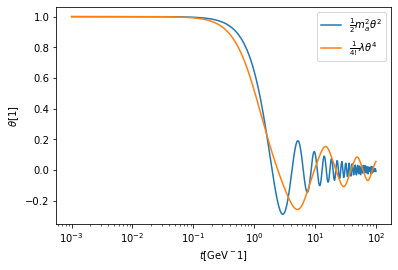

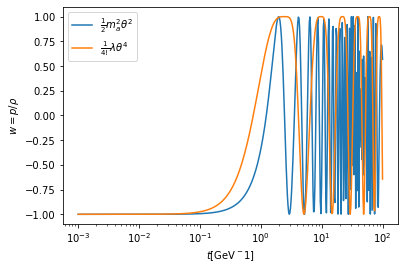

In [44]:
energy = 1.0
m = find_parameter(V_harm, energy)
lamda = find_parameter(V_anharm, energy)
t, theta_harm, theta_harm_dot = solve_eom(V_harm, V_harm_deriv, m)
t, theta_anharm, theta_anharm_dot = solve_eom(V_anharm, V_anharm_deriv, lamda)
w_harm = calc_eos(V_harm, theta_harm, theta_harm_dot, m)
w_anharm = calc_eos(V_anharm, theta_anharm, theta_anharm_dot, lamda)

harm_label = r"$\frac{1}{2} m_a^2 \theta^2$"
anharm_label = r"$\frac{1}{4!} \lambda \theta^4$"
time_label ="$t [\mathrm{GeV}^-1]$"
plt.semilogx(t, theta_harm, label=harm_label)
plt.semilogx(t, theta_anharm, label=anharm_label)
plt.xlabel(time_label)
plt.ylabel(r"$\theta [1]$")
plt.legend()
plt.show()

plt.semilogx(t, w_harm, label=harm_label)
plt.semilogx(t, w_anharm, label=anharm_label)
plt.xlabel(time_label)
plt.ylabel(r"$w = p / \rho$")
plt.legend()

In [45]:
def V_cos(theta, m):
    return m * (1 - np.cos(theta))

def V_cos_deriv(theta, m):
    return m * np.sin(theta)

In [57]:
def calc_number_density(V, theta, theta_dot, m):
    rho = V(theta, m) + kinetic(theta_dot)
    return rho / m

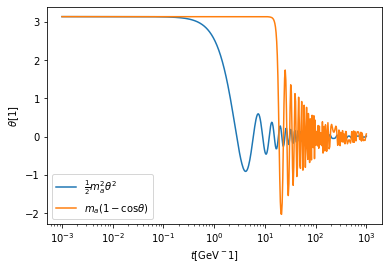

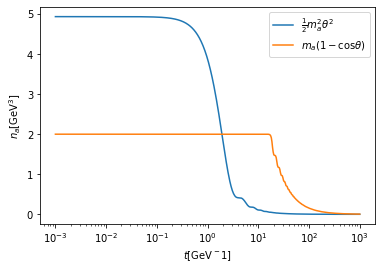

In [65]:
m = 1
theta0 = np.pi - 1e-6
I = (1e-3, 1e3)
t, theta_harm, theta_harm_dot = solve_eom(V_harm, V_harm_deriv, m, theta0=theta0, interval=I)
t, theta_cos, theta_cos_dot = solve_eom(V_cos, V_cos_deriv, m, theta0=theta0, interval=I)
w_harm = calc_eos(V_harm, theta_harm, theta_harm_dot, m)
w_anharm = calc_eos(V_cos, theta_cos, theta_cos_dot, m)

harm_label = r"$\frac{1}{2} m_a^2 \theta^2$"
cos_label = r"$m_a (1 - \cos \theta)$"
time_label ="$t [\mathrm{GeV}^-1]$"

plt.semilogx(t, theta_harm, label=harm_label)
plt.semilogx(t, theta_cos, label=cos_label)
plt.xlabel(time_label)
plt.ylabel(r"$\theta [1]$")
plt.legend()
plt.show()

plt.figure()
plt.semilogx(t, calc_number_density(V_harm, theta_harm, theta_harm_dot, m), label=harm_label)
plt.semilogx(t, calc_number_density(V_cos,  theta_cos,  theta_cos_dot,  m), label=cos_label)
plt.xlabel(time_label)
plt.ylabel("$n_a [\mathrm{GeV}^3]$")
plt.legend()
plt.show()
